# Simple CNN for compare default parameters in further applications
#### Previous adversial ensemble network will be created in another file

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" #If using Matplotlib on Windows with different versions, this will surpress error
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import statistics 
from scipy import ndimage #Image Smoothing
from collections import Counter
import foolbox as fb
from torch.autograd import Variable
device = torch.device("cpu")
import sys
sys.path.append('../src/functions')
from clean_nn_weights import reset_weights    

#Git merge main/main master

Define dataloader parameter

In [2]:
batch_size_train = 32
batch_size_test = 32
random_seed = 1337
torch.backends.cudnn.enabled = True
torch.backends.cudnn.deterministic = True
torch.manual_seed(random_seed)  #Static random seed for reproducibility

Load MNIST Dataset from torchvision

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True, drop_last=True,worker_init_fn=random_seed)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True,drop_last=True,worker_init_fn=random_seed)

Load CIFAR10 Da taset from torchvision

In [8]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('../data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                              #torchvision.transforms.Normalize(
                              #   (0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
                                torchvision.transforms.Resize(size=(28,28))
                             ])),
  batch_size=batch_size_train, shuffle=True, drop_last=True,worker_init_fn=random_seed)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('../data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               #torchvision.transforms.Normalize(
                                # (0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
                                torchvision.transforms.Resize(size=(28,28))
                             ])),
  batch_size=batch_size_test, shuffle=True,drop_last=True,worker_init_fn=random_seed)

Files already downloaded and verified
Files already downloaded and verified


#### Quick analysis of class balances

Min: 0.0006402533035725355
Max: 1.0
0.9993597


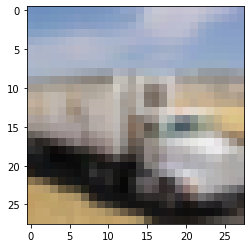

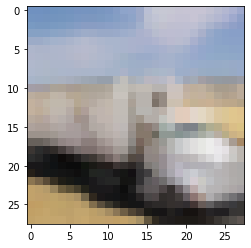

In [43]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
print("Min: {}".format(min(np.ravel(x_d))))
print("Max: {}".format(max(np.ravel(x_d))))
print(abs(min(np.ravel(x_d))-max(np.ravel(x_d))))
#img = np.transpose(img, axes=[1, 2, 0])  # Put the 0-th dimension at the end
    
    # Image are supposed to be unsigned 8-bit integers. If we keep the raw images, then
    # this line is not needed. However, if we normalize or whiten the image, then the values become
    # floats. So we need to convert them back to uint8s.
plt.imshow(np.transpose(x_d[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(median_smoothing(x_d)[31], axes=[1, 2, 0]))
plt.show()



Min: 0.0
Max: 1.0
1.0


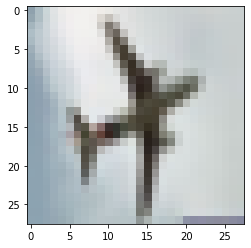

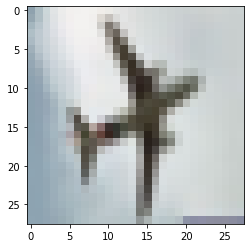

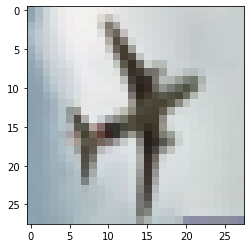

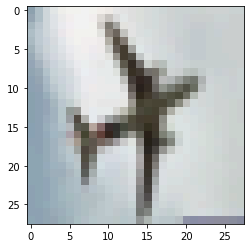

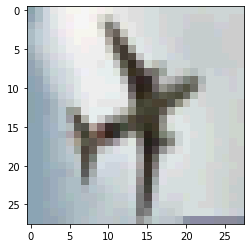

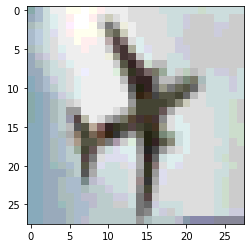

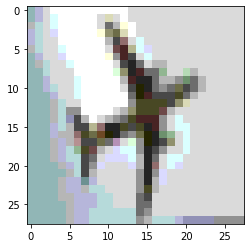

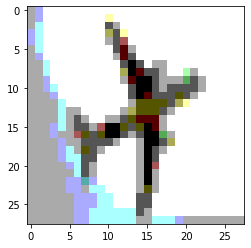

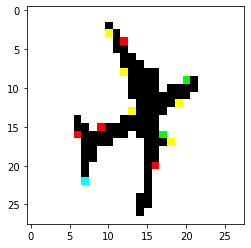

In [10]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
print("Min: {}".format(min(np.ravel(x_d))))
print("Max: {}".format(max(np.ravel(x_d))))
print(abs(min(np.ravel(x_d))-max(np.ravel(x_d))))
#img = np.transpose(img, axes=[1, 2, 0])  # Put the 0-th dimension at the end
    
    # Image are supposed to be unsigned 8-bit integers. If we keep the raw images, then
    # this line is not needed. However, if we normalize or whiten the image, then the values become
    # floats. So we need to convert them back to uint8s.
plt.imshow(np.transpose(x_d[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=8)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=7)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=6)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=5)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=4)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=3)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=2)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=1)[31], axes=[1, 2, 0]))
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Min: -1.9838844537734985
Max: 2.130864143371582
4.1147485


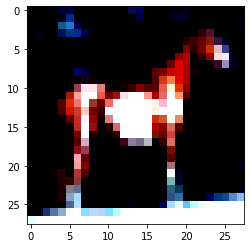

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


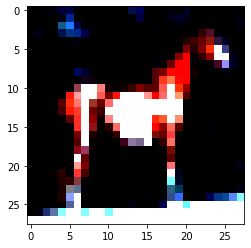

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


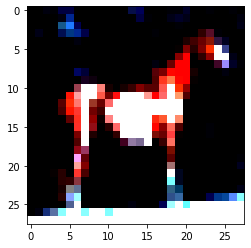

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


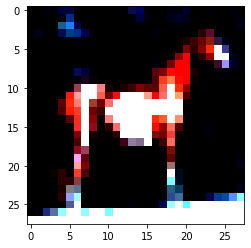

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


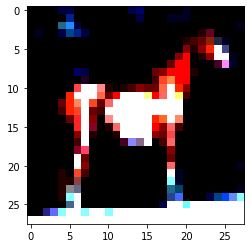

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


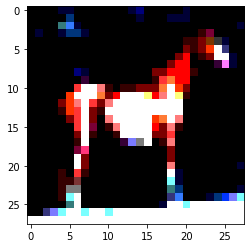

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


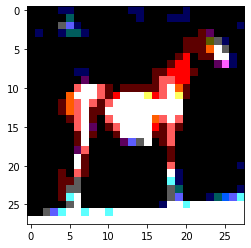

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


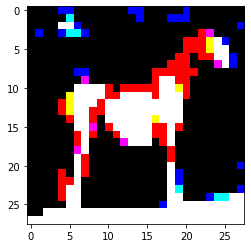

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


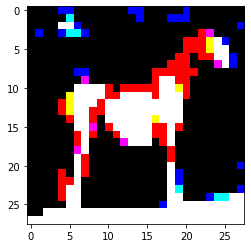

In [653]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
print("Min: {}".format(min(np.ravel(x_d))))
print("Max: {}".format(max(np.ravel(x_d))))
print(abs(min(np.ravel(x_d))-max(np.ravel(x_d))))
#img = np.transpose(img, axes=[1, 2, 0])  # Put the 0-th dimension at the end
    
    # Image are supposed to be unsigned 8-bit integers. If we keep the raw images, then
    # this line is not needed. However, if we normalize or whiten the image, then the values become
    # floats. So we need to convert them back to uint8s.
plt.imshow(np.transpose(x_d[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=8)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=7)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=6)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=5)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=4)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=3)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=2)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=1)[31], axes=[1, 2, 0]))
plt.show()


In [48]:
print(train_loader.dataset.train_data.size())
print(test_loader.dataset.test_data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


f:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
f:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [41]:
nr_train = np.array([])
for i, (data, target) in enumerate(train_loader):
    nr_train=np.append(nr_train, target.cpu().detach().numpy())

nr_test = np.array([])
for i, (data, target) in enumerate(test_loader):
    nr_test=np.append(nr_test, target.cpu().detach().numpy())

In [14]:
Counter(np.sort(nr_train))

Counter({0.0: 6902,
         1.0: 7875,
         2.0: 6988,
         3.0: 7140,
         4.0: 6822,
         5.0: 6311,
         6.0: 6874,
         7.0: 7292,
         8.0: 6824,
         9.0: 6956})

In [11]:
Counter(np.sort(nr_test))

Counter({0.0: 979,
         1.0: 1133,
         2.0: 1030,
         3.0: 1009,
         4.0: 980,
         5.0: 890,
         6.0: 956,
         7.0: 1027,
         8.0: 973,
         9.0: 1007})

In [6]:
def extract_dataloader_images(epoch):
  #for batch_idx, (data, target) in enumerate(train_loader):
  examples = enumerate(test_loader,start=0)
  _, (example_data, example_targets) = next(examples)
  return(example_data, example_targets)

def count_perturbated_pixel(img1,img2):
  sum_px = 28*28
  sum_px_perturbed = 0
  for px_img1,px_img2 in zip(img1[0][0],img2[0][0]): #Zip Array of Pixels
    for px_im1,px_im2 in zip(px_img1,px_img2): #Zip Pixels
        if (px_im1 != px_im2):
            sum_px_perturbed+=1
  return((sum_px_perturbed/sum_px),sum_px,sum_px_perturbed)

def perturbate_image(img_data,mode='random',value=100):
  if (mode=='random'):
      for i in range(value):
          img_data[0][0][random.randrange(1,28),random.randrange(1,28)]=random.uniform(min(np.ravel(img_data)),max(np.ravel(img_data)))
  elif (mode=='random_white'):
      for i in range(value):
          img_data[0][0][random.randrange(1,28),random.randrange(1,28)]=round(max(np.ravel(img_data)))
  return(img_data)

def median_smoothing(img_data,kernel_size=2):
  from scipy import ndimage
  img_data_median = torch.clone(img_data)
  if  "CIFAR" in str(test_loader.dataset):
    for i in range(img_data_median.shape[0]):
      for j in range(img_data_median.shape[1]): #RGB Values
        img_data_median[i][j] = torch.from_numpy(ndimage.median_filter(img_data_median[i][j], size=kernel_size))
  else:  
    #print(img_data_median.shape.__len__())
    if (img_data_median.shape.__len__() > 2):
      for i in range(img_data_median.shape[0]):
        img_data_median[i][0] = torch.from_numpy(ndimage.median_filter(img_data_median[i][0], size=kernel_size))
    else:
      img_data_median = torch.from_numpy(ndimage.median_filter(img_data_median, size=kernel_size))
  return(img_data_median)

def bit_reduction(img_data,clip_min=0.499999,clip_max=0.5,bit=4):

  img_data_bit = torch.clone(img_data)
 
  img_min = min(np.ravel(img_data_bit))
  img_max = max(np.ravel(img_data_bit))

  if  "CIFAR" in str(test_loader.dataset):
    step_size = abs(img_min-img_max)/(pow(2,bit)-1)
    steps = pow(2,bit)
    #print("Steps: ",steps)
    #print("Step size: ",step_size)
    #print("Distance: ",abs(img_min-img_max))
    #print("Min: ",img_min)
    #print("Max: ",img_max)
    #steps = 4
    reduced_data = (img_data_bit-min(np.ravel(img_data_bit))) / (max(np.ravel(img_data_bit)) - min(np.ravel(img_data_bit)))
    step_size_norm = abs(min(np.ravel(reduced_data))-max(np.ravel(reduced_data)))/pow(2,bit)
    #print("Step size norm: ",step_size_norm)
    for i in range(img_data_bit.shape[0]):
      for j in range(img_data_bit.shape[1]): #RGB Values
        for k in range(steps):
          #print("Greater than: ",step_size_norm*k)
          #print("Lesser than: ",step_size_norm*(k+1))
          #print("K: ",k)
          reduced_data[i][j][(reduced_data[i][j]>=(step_size_norm*(k))) & (reduced_data[i][j]<=step_size_norm*(k+1))] = img_min+(k*step_size)
          #reduced_data[i][j][reduced_data[i][j]<step_size] = torch.from_numpy(np.array(img_min))
          #reduced_data[i][j][(reduced_data[i][j]>=step_size) & (reduced_data[i][j]<step_size*2)] = torch.from_numpy(np.array(img_min+step_size))
          #reduced_data[i][j][(reduced_data[i][j]>=step_size*2) & (reduced_data[i][j]<step_size*3)] = torch.from_numpy(np.array(img_min+step_size*2))
          #reduced_data[i][j][reduced_data[i][j]>=step_size*3] = torch.from_numpy(np.array(img_max))
          #print("Setted Value: ",img_min+(k*step_size))
          #print("XXXXX")
       # reduced_data[i][j][reduced_data[i][j]<ranges] = torch.from_numpy(np.array(img_min))
       # reduced_data[i][j][(reduced_data[i][j]>=ranges) & (reduced_data[i][j]<ranges*2)] = torch.from_numpy(np.array(img_min+ranges))
       # reduced_data[i][j][(reduced_data[i][j]>=ranges*2) & (reduced_data[i][j]<ranges*3)] = torch.from_numpy(np.array(img_min+ranges*2))
       # reduced_data[i][j][reduced_data[i][j]>=ranges*3] = torch.from_numpy(np.array(img_max))
  else:
    reduced_data = (img_data_bit-min(np.ravel(img_data_bit))) / (max(np.ravel(img_data_bit)) - min(np.ravel(img_data_bit)))
    reduced_data = reduced_data.clip(min=clip_min,max=clip_max)

    if (img_data_bit.shape.__len__() > 2):
      for i in range(img_data_bit.shape[0]):
        reduced_data[i][0][reduced_data[i][0]<clip_max] = torch.from_numpy(np.array(img_min))
        reduced_data[i][0][reduced_data[i][0]==clip_max] = torch.from_numpy(np.array(img_max))
    else:
      reduced_data[0][reduced_data[0]<clip_max] = torch.from_numpy(np.array(img_min))
      reduced_data[0][reduced_data[0]==clip_max] = torch.from_numpy(np.array(img_max))

  #reduced_data[reduced_data[0]==1]=img_max
  #reduced_data[reduced_data[0]==0]=img_min
  return(reduced_data)



def test_fake(data,use_network):
  use_network.eval()
  #network.eval()
  with torch.no_grad():
      output = use_network(data)
      return output

In [296]:
class ensemble_rectification(nn.Module): # This is the same as the previous one, but with a different (and more easy to understand) architecture. It has a few more neurons in each layer, replaced x.view(-1, 320) with linear layer. Replaced functional dropout with nn.dropout.
	def __init__(self, numChannels, classes):
		super(ensemble_rectification, self).__init__()

		#Net1
		self.conv1_1 = nn.Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(5, 5))
		self.relu1_1 = nn.ReLU()
		self.maxpool1_1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		self.conv2_1 = nn.Conv2d(in_channels=20, out_channels=50,
			kernel_size=(5, 5))
		self.relu2_1 = nn.ReLU()
		self.maxpool2_1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		self.conv2_drop_1 = nn.Dropout2d()

		self.fc1_1 = nn.Linear(in_features=800, out_features=500)
		self.relu3_1 = nn.ReLU()
		self.dropout_l_1 = nn.Dropout(p=0.5)
		self.fc2_1 = nn.Linear(in_features=500, out_features=classes)

		#Net2
		self.conv1_2 = nn.Conv2d(in_channels=numChannels, out_channels=30,
			kernel_size=(5, 5))
		self.relu1_2 = nn.ReLU()
		self.maxpool1_2 = nn.MaxPool2d(kernel_size=(2), stride=(2, 2))

		self.conv2_2 = nn.Conv2d(in_channels=30, out_channels=75,
			kernel_size=(5, 5))
		self.relu2_2 = nn.ReLU()
		self.maxpool2_2 = nn.MaxPool2d(kernel_size=(2), stride=(2, 2))

		self.conv2_drop_2 = nn.Dropout2d()

		self.fc1_2 = nn.Linear(in_features=1200, out_features=900)
		self.relu3_2 = nn.ReLU()
		self.dropout_l_2 = nn.Dropout(p=0.3)
		self.fc2_2 = nn.Linear(in_features=900, out_features=classes)

		#Net3
		self.conv1_3 = nn.Conv2d(in_channels=numChannels, out_channels=50,
			kernel_size=(5, 5))
		self.relu1_3 = nn.ReLU()
		self.maxpool1_3 = nn.MaxPool2d(kernel_size=(2), stride=(2))

		self.conv2_3 = nn.Conv2d(in_channels=50, out_channels=125,
			kernel_size=(5, 5))
		self.relu2_3 = nn.ReLU()
		self.maxpool2_3 = nn.MaxPool2d(kernel_size=(2), stride=(2))

		self.conv2_drop_3 = nn.Dropout2d()

		self.fc1_3 = nn.Linear(in_features=2000, out_features=1000)
		self.relu3_3 = nn.ReLU()
		self.dropout_l_3 = nn.Dropout(p=0.2)
		self.fc2_3 = nn.Linear(in_features=1000, out_features=classes)
			
	def forward(self, orig):
		x = self.conv1_1(orig)
		x = self.relu1_1(x)
		x = self.maxpool1_1(x)
		x = self.conv2_1(x)
		x = self.relu2_1(x)
		x = self.maxpool2_1(x)
		x = self.conv2_drop_1(x)
		x = torch.flatten(x, 1)
		x = self.fc1_1(x)
		x = self.relu3_1(x)
		x = self.dropout_l_1(x)
		x = self.fc2_1(x)

		y = self.conv1_2(orig)
		y = self.relu1_2(y)
		y = self.maxpool1_2(y)
		y = self.conv2_2(y)
		y = self.relu2_2(y)
		y = self.maxpool2_2(y)
		y = self.conv2_drop_2(y)
		y = torch.flatten(y, 1)
		y = self.fc1_2(y)
		y = self.relu3_2(y)
		y = self.dropout_l_2(y)
		y = self.fc2_2(y)

		z = self.conv1_3(orig)
		z = self.relu1_3(z)
		z = self.maxpool1_3(z)
		z = self.conv2_3(z)
		z = self.relu2_3(z)
		z = self.maxpool2_3(z)
		z = self.conv2_drop_3(z)
		z = torch.flatten(z, 1)
		z = self.fc1_3(z)
		z = self.relu3_3(z)
		z = self.dropout_l_3(z)
		z = self.fc2_3(z)

		concat = torch.cat([x, y, z], dim=1)

		return concat

In [21]:
class simple_net(nn.Module):
    def __init__(self):
        super(simple_net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [22]:
class simple_net_upgraded(nn.Module): # This is the same as the previous one, but with a different (and more easy to understand) architecture. It has a few more neurons in each layer, replaced x.view(-1, 320) with linear layer. Replaced functional dropout with nn.dropout.
	def __init__(self, numChannels, classes):
		super(simple_net_upgraded, self).__init__()

		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		self.conv2_drop = nn.Dropout2d()

		self.fc1 = nn.Linear(in_features=800, out_features=500)
		self.relu3 = nn.ReLU()
		self.dropout_l = nn.Dropout(p=0.5)
		self.fc2 = nn.Linear(in_features=500, out_features=classes)

	def forward(self, x):

		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)

		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		x = self.conv2_drop(x)
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		x = self.dropout_l(x)
		x = self.fc2(x)
		return x

In [23]:
class simple_net_upgraded2(nn.Module): 											# This is the same as the previous one, but with a different (and more easy to understand) architecture. It has a few more neurons in each layer, replaced x.view(-1, 320) with linear layer. Replaced functional dropout with nn.dropout.
	def __init__(self, numChannels, classes):
		super(simple_net_upgraded2, self).__init__()

		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=30,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2), stride=(2, 2))

		self.conv2 = nn.Conv2d(in_channels=30, out_channels=75,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2), stride=(2, 2))

		self.conv2_drop = nn.Dropout2d()

		self.fc1 = nn.Linear(in_features=1200, out_features=900)
		self.relu3 = nn.ReLU()
		self.dropout_l = nn.Dropout(p=0.3)
		self.fc2 = nn.Linear(in_features=900, out_features=classes)

	def forward(self, x):

		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)

		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		x = self.conv2_drop(x)
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		x = self.dropout_l(x)
		x = self.fc2(x)
		return x

In [24]:
class simple_net_upgraded3(nn.Module): # This is the same as the previous one, but with a different (and more easy to understand) architecture. It has a few more neurons in each layer, replaced x.view(-1, 320) with linear layer. Replaced functional dropout with nn.dropout.
	def __init__(self, numChannels, classes):
		super(simple_net_upgraded3, self).__init__()

		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=50,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2), stride=(2))

		self.conv2 = nn.Conv2d(in_channels=50, out_channels=125,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2), stride=(2))

		self.conv2_drop = nn.Dropout2d()

		self.fc1 = nn.Linear(in_features=2000, out_features=1000)
		self.relu3 = nn.ReLU()
		self.dropout_l = nn.Dropout(p=0.2)
		self.fc2 = nn.Linear(in_features=1000, out_features=classes)

	def forward(self, x):

		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)

		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		x = self.conv2_drop(x)
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		x = self.dropout_l(x)
		x = self.fc2(x)
		return x

In [662]:
log_interval = 187 #60000/batch_size_train = 1875 => 10 Datapoints per Epoch => 187 Logs per Epoch
n_epochs = 20
learning_rate = 0.007
momentum = 0.5
load_data = 1
###########
use_upgraded_net = 1
use_ensemble = 1
use_integrated_ensemble = 1
##########
save_net = 0
##########

if (use_upgraded_net == 1):  
    if (use_ensemble == 1):
        if (use_integrated_ensemble==1):
            if  "CIFAR" in str(test_loader.dataset):
                network = ensemble_rectification(3,10)
                network.apply(reset_weights)
            elif "MNIST" in str(test_loader.dataset):
                network = ensemble_rectification(1,10)
                network.apply(reset_weights)
            print("Using integrated Ensemble")
        else:
            network = simple_net_upgraded(1,10)
            network2 = simple_net_upgraded2(1,10)
            network3 = simple_net_upgraded3(1,10)
            network.apply(reset_weights)
            network2.apply(reset_weights)
            network3.apply(reset_weights)
            print("Using Ensemble")
        
    
    else:
        network = simple_net_upgraded(1,10)
        network.apply(reset_weights)
        print ("Using Upgraded Net")
else:
    network = simple_net()
    network.apply(reset_weights)
    print ("Using Basic Net")


#device = "cuda:0"
#network.to(device)
if (use_ensemble == 0):
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
if (use_ensemble == 1 and use_integrated_ensemble == 0):
    optimizer_ensemble = optim.SGD(list(network.parameters())+list(network2.parameters())+list(network3.parameters()), lr=learning_rate, momentum=momentum)
    print("Loaded Optimizer for Ensemble")
if (use_ensemble and use_integrated_ensemble):
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

if (load_data and use_upgraded_net == 0):
    network.load_state_dict(torch.load('../src/results/model.pth'))
    print('Loaded model from file')
    optimizer.load_state_dict(torch.load('../src/results/optimizer.pth'))
    print('Loaded optimizer from basic model')
if (load_data and use_upgraded_net == 1):
    if (use_ensemble==1 and use_integrated_ensemble==0):
        network.load_state_dict(torch.load('../src/results/model_upgraded_ens.pth'))
        network2.load_state_dict(torch.load('../src/results/model2_upgraded_ens.pth'))
        network3.load_state_dict(torch.load('../src/results/model3_upgraded_ens.pth'))
        print('Loaded upgraded ensemble model from file')
        optimizer_ensemble.load_state_dict(torch.load('../src/results/optimizer_ensemble.pth'))
        print('Loaded ensemble optimizer from upgraded model')
    if (use_ensemble and use_integrated_ensemble):

        if  "CIFAR" in str(test_loader.dataset):
            network.load_state_dict(torch.load('../src/results/model_integrated_ens_cifar.pth'))
            print('Loaded integrated ensemble model for cifar from file')
            optimizer.load_state_dict(torch.load('../src/results/optimizer_integrated_cifar.pth'))
            print('Loaded optimizer from integrated ensemble model for cifar')
        else:
            network.load_state_dict(torch.load('../src/results/model_integrated_ens.pth'))
            print('Loaded integrated ensemble model from file')
            optimizer.load_state_dict(torch.load('../src/results/optimizer_integrated.pth'))
            print('Loaded optimizer from integrated ensemble model')

    if (use_ensemble==0 and use_integrated_ensemble==0):
        network.load_state_dict(torch.load('../src/results/model_upgraded_ens.pth'))
        print('Loaded upgraded model from file')
        optimizer.load_state_dict(torch.load('../src/results/optimizer_upgraded.pth'))
        print('Loaded optimizer from upgraded model')

if (save_net==1):
    print('WARNING: Saving model to file!! Will overwrite existing file!!!')

Reset trainable parameters of layer = Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=800, out_features=500, bias=True)
Reset trainable parameters of layer = Linear(in_features=500, out_features=10, bias=True)
Reset trainable parameters of layer = Conv2d(3, 30, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(30, 75, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=1200, out_features=900, bias=True)
Reset trainable parameters of layer = Linear(in_features=900, out_features=10, bias=True)
Reset trainable parameters of layer = Conv2d(3, 50, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(50, 125, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=2000, out_features=1000, bias=True)
Reset trainable pa

In [298]:
def train(epoch,use_ensemble=0,adversial_train=0):
  network.train()
  if (use_ensemble==1 and use_integrated_ensemble==0):
    network2.train()
    network3.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    if (use_ensemble == 1 and use_integrated_ensemble == 0):
      optimizer_ensemble.zero_grad()
      output1 = network(data)
      output2 = network2(data)
      output3 = network3(data)
      output = (output1 + output2 + output3)/3 # Average of three networks...not used here but it is usefull in test. You could also use the aggregated output as for the loss but that can result in false weight balancings when a specific model has made a false prediction. Need more literature checking!
      #loss = F.cross_entropy(output, target)
      #loss.backward()
      loss1 = F.cross_entropy(output1, target)
      loss2 = F.cross_entropy(output2, target)
      loss3 = F.cross_entropy(output3, target)
      loss = (loss1 + loss2 + loss3)
      loss.backward()
      optimizer_ensemble.step()
    else:
      optimizer.zero_grad()
      if (adversial_train):
        ########!
        fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
        attack = fb.attacks.FGSM()
        epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
        raw_advs, advs, is_adv = attack(fmodel, data, target, epsilons=epsilons)
        data = raw_advs[0]
      ########!
      output = network(data)
      loss = F.cross_entropy(output, target)
      loss.backward()
      optimizer.step()
    
    
    
    if (batch_idx % log_interval == 0) and (batch_idx != 0):
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      if (use_ensemble==1 and use_integrated_ensemble ==0):  
        print('Loss 1: {:.6f}'.format(loss1.item()))
        print('Loss 2: {:.6f}'.format(loss2.item()))
        print('Loss 3: {:.6f}'.format(loss3.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*batch_size_train) + ((epoch-1)*len(train_loader.dataset)))
#https://discuss.pytorch.org/t/optimizing-based-on-another-models-output/6935/14
#https://discuss.pytorch.org/t/using-a-combined-loss-to-update-two-different-models/73925
      

# Train difference value for adversial detection

In [71]:
def evaluate_threshold(network,train_loader,start,end,step):
  epsilons = []
  pertubation_ratio = []
  network.eval()
  with torch.no_grad():
    baseline_acc = test()
    while(start <= end):
      pertubated=0
      not_pertubated=0
      for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
      
        output = network(data)

        # Output median smoothed ensemble
        median_smoothed_batch=torch.clone(data)
        median_smoothed_batch = median_smoothing(median_smoothed_batch)
        output_ms = network(median_smoothed_batch)
        # Output bit reduced ensemble
        bit_reduced_batch=torch.clone(data)
        bit_reduced_batch = bit_reduction(bit_reduced_batch)
        output_br = network(bit_reduced_batch)
      
        pred = output.data.max(1, keepdim=True)[1]
        pred_ms = output_ms.data.max(1, keepdim=True)[1]
        pred_br = output_br.data.max(1, keepdim=True)[1]

        tensor_map_pred= F.softmax(output, dim=1)
        tensor_map_ms = F.softmax(output_ms, dim=1)
        tensor_map_br = F.softmax(output_br, dim=1)
      
        for x in range(len(pred)):
          difference_ms=(tensor_map_pred[x])-(tensor_map_ms[x])
          difference_br=(tensor_map_pred[x])-(tensor_map_br[x])
          distance_list=[max(difference_br).item(),max(difference_ms).item()]
          #difference_total = statistics.fmean(distance_list)
          difference_total = max(distance_list)
          #print("Max Tensor Distance:", difference_total)
          if (difference_total > start):
            pertubated+=1
            #print("Image is pertubated")
          else:
            not_pertubated+=1
            #print("Image is not pertubated")
      ratio=(100/len(train_loader.dataset))*not_pertubated
      epsilons.append(start)
      pertubation_ratio.append(ratio)
      print("Threshold {} with accuracy {}%".format(start,ratio))
      print("Threshold Accuracy/Baseline Accuracy diff: ",abs(baseline_acc.item()-ratio))
      print("Pertubated: {}".format(pertubated))
      print("Not Pertubated: {}".format(not_pertubated))
      print("#############################################")
      start+=step
  return(np.array(epsilons),np.array(pertubation_ratio),np.array(pertubated),np.array(not_pertubated))
  
      

In [72]:
ep, pert_ratio, pt, n_pt = evaluate_threshold(network,train_loader,start=0.005,end=0.050,step=0.005)


Test set: Avg. loss: 0.0007, Accuracy: 9920/10000 (99%)

Threshold 0.005 with accuracy 90.11%
Threshold Accuracy/Baseline Accuracy diff:  9.089996948242188
Pertubated: 5934
Not Pertubated: 54066
#############################################
Threshold 0.01 with accuracy 92.42%
Threshold Accuracy/Baseline Accuracy diff:  6.779996948242186
Pertubated: 4548
Not Pertubated: 55452
#############################################
Threshold 0.015 with accuracy 93.43833333333333%
Threshold Accuracy/Baseline Accuracy diff:  5.761663614908855
Pertubated: 3937
Not Pertubated: 56063
#############################################
Threshold 0.02 with accuracy 94.14666666666668%
Threshold Accuracy/Baseline Accuracy diff:  5.053330281575512
Pertubated: 3512
Not Pertubated: 56488
#############################################
Threshold 0.025 with accuracy 94.64%
Threshold Accuracy/Baseline Accuracy diff:  4.559996948242187
Pertubated: 3216
Not Pertubated: 56784
#############################################


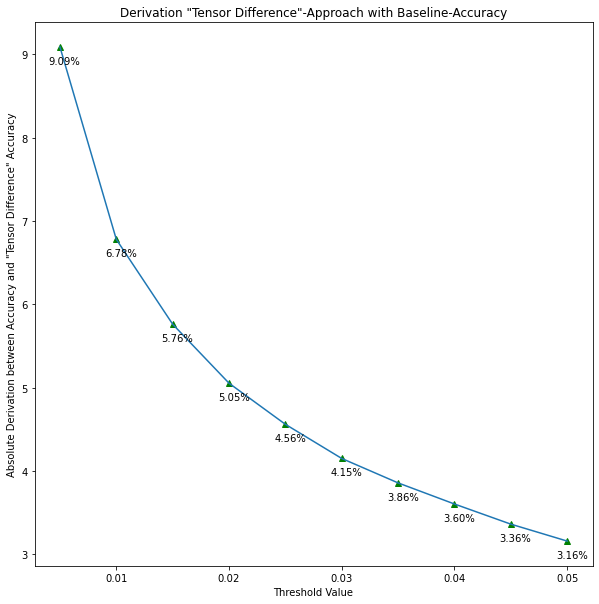

In [166]:

plt.figure(figsize=(10,10))
plt.xlabel('Threshold Value')
plt.ylabel('Absolute Derivation between Accuracy and "Tensor Difference" Accuracy')
plt.title('Derivation "Tensor Difference"-Predictions with Baseline-Accuracy')

for i in range(len(pert_ratio)):
    plt.annotate("{:.2f}%".format(99.20-pert_ratio[i]), (ep[i]-0.001,99.20-pert_ratio[i]-0.2))
plt.plot(ep, 99.20-pert_ratio, 'g^',ep,99.20-pert_ratio)

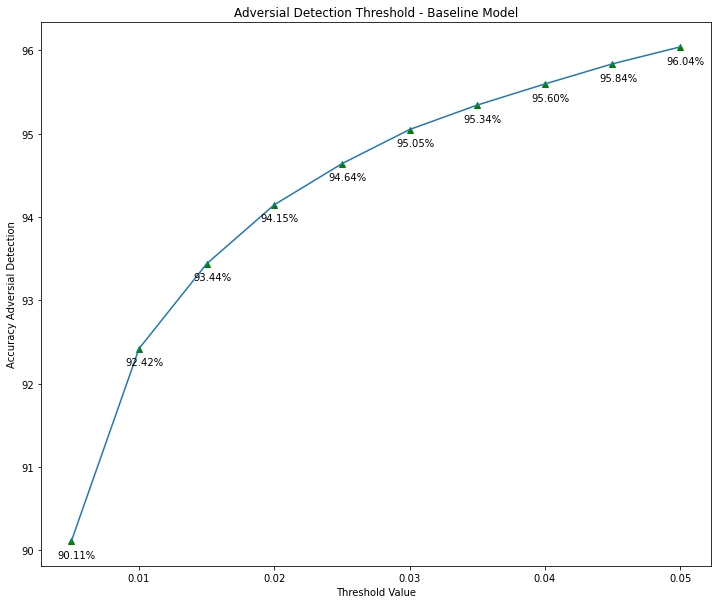

In [114]:

plt.figure(figsize=(12,10))
plt.xlabel('Threshold Value')
plt.ylabel('Accuracy Adversial Detection')
plt.title('Adversial Detection Threshold - Baseline Model')

for i in range(len(pert_ratio)):
    plt.annotate("{:.2f}%".format(pert_ratio[i]), (ep[i]-0.001,pert_ratio[i]-0.2))
plt.plot(ep, pert_ratio, 'g^',ep,pert_ratio)

In [12]:
#! Warning: Function is really slow because it generates new pertubations for each step

start=0.4
end=0.5
step=0.01
pert_count=0
epsilons = []
pertubation_ratio = []
accuracies_adversial = []
from foolbox.criteria import Misclassification
# load data from dataloader
while(start <= end):
  pertubated=0
  not_pertubated=0
  pert_count=0
  for i, data in enumerate(train_loader,0):
    input, label = data
    input, label = Variable(input.to(device)), Variable(label.to(device))

    model = network.eval()

      
      # Generate adversial dataset for attack
    fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
    attack = fb.attacks.FGSM()
    epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
    criterion = Misclassification(label)
    raw_advs, advs, is_adv = attack(fmodel, input, label, epsilons=epsilons)
    output = network(raw_advs[0])

        # Output median smoothed ensemble
    median_smoothed_batch=torch.clone(raw_advs[0])
    median_smoothed_batch = median_smoothing(median_smoothed_batch)
    output_ms = network(median_smoothed_batch)
        # Output bit reduced ensemble
    bit_reduced_batch=torch.clone(raw_advs[0])
    bit_reduced_batch = bit_reduction(bit_reduced_batch)
    output_br = network(bit_reduced_batch)
      
    pred = output.data.max(1, keepdim=True)[1]
    pred_ms = output_ms.data.max(1, keepdim=True)[1]
    pred_br = output_br.data.max(1, keepdim=True)[1]

    tensor_map_pred= F.softmax(output, dim=1)
    tensor_map_ms = F.softmax(output_ms, dim=1)
    tensor_map_br = F.softmax(output_br, dim=1)
      
    for x in range(len(pred)):
      difference_ms=abs((tensor_map_pred[x])-(tensor_map_ms[x]))
      difference_br=abs((tensor_map_pred[x])-(tensor_map_br[x]))
      distance_list=[max(difference_br).item(),max(difference_ms).item()]
          #difference_total = statistics.fmean(distance_list)
      difference_total = max(distance_list)
          #print("Max Tensor Distance:", difference_total)
      if (difference_total > start):
        pertubated+=1
            #print("Image is pertubated")
      else:
        not_pertubated+=1
            #print("Image is not pertubated")
    pert_count+=np.count_nonzero(is_adv.cpu().view(-1).numpy())
    accuracies_adversial.append(fb.utils.accuracy(fmodel, raw_advs[0], label))
  ratio=(100/pert_count)*pertubated
  epsilons.append(start)
  pertubation_ratio.append(ratio)
  
  print("Threshold {} with derivation of {}%".format(start,100-ratio))
  print("Accuracy attacked Baseline: ",np.array(accuracies_adversial).mean())
  print("Pertubated real: {}".format(pert_count))
  print("Pertubated calculated: {}".format(pertubated))
  print("Not Pertubated calculated: {}".format(not_pertubated))
  print("#############################################")
  start+=step

Threshold 0.4 with derivation of -10.366574694521091%
Accuracy attacked Baseline:  0.9154333333333333
Pertubated real: 5074
Pertubated calculated: 5600
Not Pertubated calculated: 54400
#############################################
Threshold 0.41000000000000003 with derivation of -7.50886874260938%
Accuracy attacked Baseline:  0.9154333333333333
Pertubated real: 5074
Pertubated calculated: 5455
Not Pertubated calculated: 54545
#############################################
Threshold 0.42000000000000004 with derivation of -4.197871501773747%
Accuracy attacked Baseline:  0.9154333333333333
Pertubated real: 5074
Pertubated calculated: 5287
Not Pertubated calculated: 54713
#############################################
Threshold 0.43000000000000005 with derivation of -1.1824990145841525%
Accuracy attacked Baseline:  0.9154333333333333
Pertubated real: 5074
Pertubated calculated: 5134
Not Pertubated calculated: 54866
#############################################
Threshold 0.44000000000000006 w

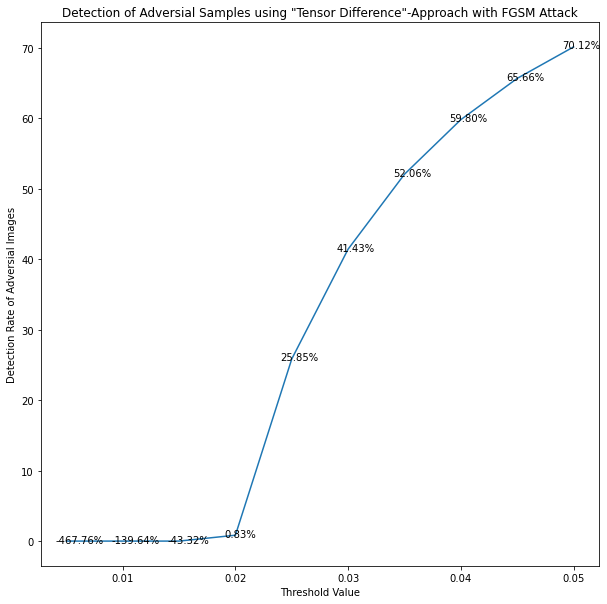

In [167]:
plt.figure(figsize=(10,10))
plt.xlabel('Threshold Value')
plt.ylabel('Detection Rate of Adversial Images')
plt.title('Detection of Adversial Samples using "Tensor Difference"-Approach with FGSM Attack')

for i in range(len(pertubation_ratio)):
    plt.annotate("{:.2f}%".format(100-pertubation_ratio[i]), (ep[i]-0.001,(100-np.array(pertubation_ratio[i])).clip(min=0)-0.2))
plt.plot(ep, (100-np.array(pertubation_ratio)).clip(min=0))

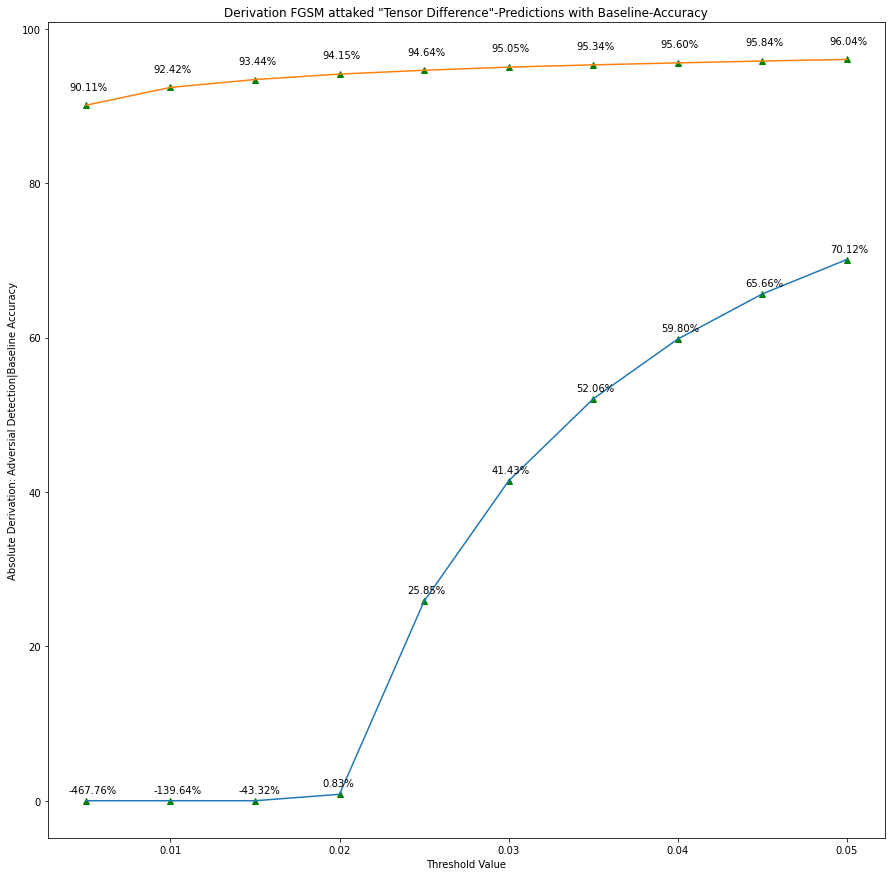

In [180]:
plt.figure(figsize=(15,15))
plt.xlabel('Threshold Value')
plt.ylabel('Absolute Derivation: Adversial Detection|Baseline Accuracy')
plt.title('Derivation FGSM attaked "Tensor Difference"-Predictions with Baseline-Accuracy')

for i in range(len(pertubation_ratio)):
    plt.annotate("{:.2f}%".format(100-pertubation_ratio[i]), (ep[i]-0.001,(100-np.array(pertubation_ratio[i])).clip(min=0)+1))
plt.plot(ep, (100-np.array(pertubation_ratio)).clip(min=0),'g^',ep, (100-np.array(pertubation_ratio)).clip(min=0))

for i in range(len(pert_ratio)):
    plt.annotate("{:.2f}%".format(pert_ratio[i]), (ep[i]-0.001,pert_ratio[i]+2))
plt.plot(ep, pert_ratio, 'g^',ep,pert_ratio)


In [661]:
def test(use_ensemble=0):
  test_losses=[]
  test_acc = []
  network.eval()
  if (use_ensemble==1 and use_integrated_ensemble==0):
    network2.eval()
    network3.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      if (use_ensemble==1 and use_integrated_ensemble==0):
        output2 = network2(data)
        output3 = network3(data)
        output = (output + output2 + output3)/3# Average of three networks. Alternative is to use majority voting using output.data.max(1)[1] for each output and write it to an array to get argmax

      test_loss += F.cross_entropy(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  acc = 100. * correct / len(test_loader.dataset)
  test_acc.append(acc)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  return(acc)

In [659]:
test()


Test set: Avg. loss: 0.0302, Accuracy: 6693/10000 (67%)



tensor(66.9300)

In [197]:
def test_conv_image_rect(use_ensemble=1):
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
    test_acc = []
    debug_output = 1
    network.eval()
    network2.eval()
    network3.eval()
    test_loss = 0
    correct = 0
    correct_ms = 0
    correct_br = 0
    correct_ensemble = 0
    pertubated = 0
    not_pertubated = 0
    with torch.no_grad():
        for data, target in test_loader:

            # Output original ensemble
            output = network(data)
            output2 = network2(data)
            output3 = network3(data)

            # Output median smoothed ensemble
            median_smoothed_batch=torch.clone(data)
            median_smoothed_batch = median_smoothing(median_smoothed_batch)
            output_ms = network(median_smoothed_batch)
            output2_ms = network2(median_smoothed_batch)
            output3_ms = network3(median_smoothed_batch)
            # Output bit reduced ensemble
            bit_reduced_batch=torch.clone(data)
            bit_reduced_batch = bit_reduction(bit_reduced_batch)
            output_br = network(bit_reduced_batch)
            output2_br = network2(bit_reduced_batch)
            output3_br = network3(bit_reduced_batch)

            # Average of three networks. Alternative is to use majority voting using output.data.max(1)[1] for each output and write it to an array to get argmax
            output = (output + output2 + output3)/3
            output_ms = (output_ms + output2_ms + output3_ms)/3
            output_br = (output_br + output2_br + output3_br)/3

            # Losses for each ensemble
            test_loss += F.cross_entropy(output, target).item()
            # To
            # Do

            # Test accuracy

            pred = output.data.max(1, keepdim=True)[1]
            pred_ms = output_ms.data.max(1, keepdim=True)[1]
            pred_br = output_br.data.max(1, keepdim=True)[1]

            tst= F.softmax(output, dim=1)
            tst_med = F.softmax(output_ms, dim=1)
            tst_scaled = F.softmax(output_br, dim=1)



            # Jury Vote for ensemble predictions
            jury_vote = []
            for x in range(len(pred)):
                votes = []
                first_vote = output.data.max(1, keepdim=True)[1][x].item()
                second_vote = output_ms.data.max(1, keepdim=True)[1][x].item()
                third_vote = output_br.data.max(1, keepdim=True)[1][x].item()
                votes.append(first_vote)
                votes.append(second_vote)
                votes.append(third_vote)
                jury_vote.append(np.bincount(votes).argmax())
                difference_ms=(tst[x])-(tst_med[x])
                difference_br=(tst[x])-(tst_scaled[x])


                distance_list=[max(difference_br).item(),max(difference_ms).item()]
                #difference_total = statistics.fmean(distance_list)
                difference_total = max(distance_list)
                #print("Max Tensor Distance:", difference_total)

                if (difference_total > 0.015):
                    pertubated+=1
                    #print("Image is pertubated")
                else:
                    not_pertubated+=1
                    #print("Image is not pertubated")
                
                if(target[x].item()==jury_vote[x]):
                    correct_ensemble += 1
                else:
                    print("Original target:",target[x].item(),"| Jury voted class:",jury_vote[x],"| Vanilla Ensemble Vote:" ,first_vote,"Median-Smoothed Ensemble Vote:",second_vote,"Bit-Reduced Ensemble Vote:",third_vote)
                    if (debug_output):
                        fig = plt.figure()
                        ax1 = fig.add_subplot(131)  # left side
                        ax2 = fig.add_subplot(132)  # right side
                        ax3 = fig.add_subplot(133)  # right side
                    
                        ax1.title.set_text("Original Image")
                        ax2.title.set_text("Median Smoothed Image")
                        ax3.title.set_text("Bit Reduced Image")

                        ax1.imshow(data[x][0], cmap='gray', interpolation='none')
                        ax2.imshow(median_smoothed_batch[x][0], cmap='gray', interpolation='none')
                        ax3.imshow(bit_reduced_batch[x][0], cmap='gray', interpolation='none')
                        fig.text(.5, .05, "Original Target: {}".format(target[x].item()), ha='center')
                        fig.set_figheight(5)
                        fig.set_figwidth(10)
                        plt.show()


            correct += pred.eq(target.data.view_as(pred)).sum()
            correct_ms += pred_ms.eq(target.data.view_as(pred_ms)).sum()
            correct_br += pred_br.eq(target.data.view_as(pred_br)).sum()
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    acc = 100. * correct / len(test_loader.dataset)
    test_acc.append(acc)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), Accuracy_Median: {}, Accuracy_BitSmooth: {}, Accuracy_Ensemble: {}, perturbated_count: {}, not_perturbated_count: {}\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset), correct_ms, correct_br, correct_ensemble, pertubated, not_pertubated))
    

In [198]:
test_conv_image_rect()

NameError: name 'network2' is not defined

In [178]:
#0.001, pert=1430,n_pert=8554
#0.002, pert=1114,n_pert=8870
#0.003, pert=961,n_pert=9023
#0.004, pert=865,n_pert=9119
#0.005, pert=803,n_pert=9181
#0.006, pert=752,n_pert=9232
#0.007, pert=710,n_pert=9274
#0.008, pert=667,n_pert=9317
#0.009, pert=627,n_pert=9357
#0.010, pert=608,n_pert=9376
#0.011, pert=586,n_pert=9398
#0.012, pert=569,n_pert=9415
#0.013, pert=552,n_pert=9432
#0.014, pert=536,n_pert=9448
#0.015, pert=515,n_pert=9469
#0.020, pert=461,n_pert=9523
#0.025, pert=432,n_pert=9552
#0.030, pert=400,n_pert=9584

In [664]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
test_acc = []
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

if (use_upgraded_net==0 and save_net==1):
  torch.save(network.state_dict(), '../src/results/model.pth')
  torch.save(optimizer.state_dict(), '../src/results/optimizer.pth')
  print("Saved Modell to file")
elif (use_upgraded_net==1 and save_net==1):
  
  if (use_ensemble == 1 and use_integrated_ensemble == 0):
      torch.save(network.state_dict(), '../src/results/model_upgraded_ens.pth')
      torch.save(network2.state_dict(), '../src/results/model2_upgraded_ens.pth')
      torch.save(network3.state_dict(), '../src/results/model3_upgraded_ens.pth')
      torch.save(optimizer_ensemble.state_dict(), '../src/results/optimizer_ensemble.pth')
  if (use_ensemble == 1 and use_integrated_ensemble == 1):
      if  "cifar" in str(test_loader.dataset.filename):
        torch.save(network.state_dict(), '../src/results/model_integrated_ens_cifar.pth')
        torch.save(optimizer.state_dict(), '../src/results/optimizer_integrated_cifar.pth')
        print("Hello")
      else:
        torch.save(network.state_dict(), '../src/results/model_integrated_ens.pth')
        torch.save(optimizer.state_dict(), '../src/results/optimizer_integrated.pth')

  if (use_ensemble==0 and use_integrated_ensemble == 0):
      torch.save(network.state_dict(), '../src/results/model_upgraded.pth')
      torch.save(optimizer.state_dict(), '../src/results/optimizer_upgraded.pth')
  print("Saved Modell to file")
save_net = 0 #Secure that only one model is saved


Test set: Avg. loss: 0.0265, Accuracy: 7210/10000 (72%)

Train Epoch: 1 [5984/50000 (12%)]	Loss: 0.728420
Train Epoch: 1 [11968/50000 (24%)]	Loss: 0.603819
Train Epoch: 1 [17952/50000 (36%)]	Loss: 0.908570
Train Epoch: 1 [23936/50000 (48%)]	Loss: 1.004236
Train Epoch: 1 [29920/50000 (60%)]	Loss: 1.222491
Train Epoch: 1 [35904/50000 (72%)]	Loss: 1.052139
Train Epoch: 1 [41888/50000 (84%)]	Loss: 0.904537
Train Epoch: 1 [47872/50000 (96%)]	Loss: 0.634715

Test set: Avg. loss: 0.0269, Accuracy: 7122/10000 (71%)

Train Epoch: 2 [5984/50000 (12%)]	Loss: 0.877920
Train Epoch: 2 [11968/50000 (24%)]	Loss: 0.852640
Train Epoch: 2 [17952/50000 (36%)]	Loss: 0.838590
Train Epoch: 2 [23936/50000 (48%)]	Loss: 0.983065
Train Epoch: 2 [29920/50000 (60%)]	Loss: 1.159346
Train Epoch: 2 [35904/50000 (72%)]	Loss: 0.795329
Train Epoch: 2 [41888/50000 (84%)]	Loss: 0.852776
Train Epoch: 2 [47872/50000 (96%)]	Loss: 0.693972

Test set: Avg. loss: 0.0266, Accuracy: 7209/10000 (72%)

Train Epoch: 3 [5984/50000 (

# Evaluate Baseline

In [199]:
def test_integrated_conv_image_rect():
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
    test_acc = []
    debug_output = 0
    network.eval()
    test_loss = 0
    correct = 0
    correct_ms = 0
    correct_br = 0
    correct_ensemble = 0
    pertubated = 0
    not_pertubated = 0
    with torch.no_grad():
        for data, target in test_loader:

            # Output original ensemble
            output = network(data)

            # Output median smoothed ensemble
            median_smoothed_batch=torch.clone(data)
            median_smoothed_batch = median_smoothing(median_smoothed_batch)
            output_ms = network(median_smoothed_batch)

            # Output bit reduced ensemble
            bit_reduced_batch=torch.clone(data)
            bit_reduced_batch = bit_reduction(bit_reduced_batch)
            output_br = network(bit_reduced_batch)

            # Losses for each ensemble
            test_loss += F.cross_entropy(output, target).item()

            # Test accuracy
            pred = output.data.max(1, keepdim=True)[1]
            pred_ms = output_ms.data.max(1, keepdim=True)[1]
            pred_br = output_br.data.max(1, keepdim=True)[1]

            tst= F.softmax(output, dim=1)
            tst_med = F.softmax(output_ms, dim=1)
            tst_scaled = F.softmax(output_br, dim=1)



            # Jury Vote for ensemble predictions
            jury_vote = []
            for x in range(len(pred)):
                votes = []
                first_vote = output.data.max(1, keepdim=True)[1][x].item()
                second_vote = output_ms.data.max(1, keepdim=True)[1][x].item()
                third_vote = output_br.data.max(1, keepdim=True)[1][x].item()
                votes.append(first_vote)
                votes.append(second_vote)
                votes.append(third_vote)
                jury_vote.append(np.bincount(votes).argmax())
                difference_ms=(tst[x])-(tst_med[x])
                difference_br=(tst[x])-(tst_scaled[x])


                distance_list=[max(difference_br).item(),max(difference_ms).item()]
                #difference_total = statistics.fmean(distance_list)
                difference_total = max(distance_list)
                #print("Max Tensor Distance:", difference_total)

                if (difference_total > 0.015):
                    pertubated+=1
                    #print("Image is pertubated")
                else:
                    not_pertubated+=1
                    #print("Image is not pertubated")
                
                if(target[x].item()==jury_vote[x]):
                    correct_ensemble += 1
                else:
                    print("Original target:",target[x].item(),"| Jury voted class:",jury_vote[x],"| Vanilla Ensemble Vote:" ,first_vote,"Median-Smoothed Ensemble Vote:",second_vote,"Bit-Reduced Ensemble Vote:",third_vote)
                    if (debug_output):
                        fig = plt.figure()
                        ax1 = fig.add_subplot(131)  # left side
                        ax2 = fig.add_subplot(132)  # right side
                        ax3 = fig.add_subplot(133)  # right side
                    
                        ax1.title.set_text("Original Image")
                        ax2.title.set_text("Median Smoothed Image")
                        ax3.title.set_text("Bit Reduced Image")

                        ax1.imshow(data[x][0], cmap='gray', interpolation='none')
                        ax2.imshow(median_smoothed_batch[x][0], cmap='gray', interpolation='none')
                        ax3.imshow(bit_reduced_batch[x][0], cmap='gray', interpolation='none')
                        fig.text(.5, .05, "Original Target: {}".format(target[x].item()), ha='center')
                        fig.set_figheight(5)
                        fig.set_figwidth(10)
                        plt.show()


            correct += pred.eq(target.data.view_as(pred)).sum()
            correct_ms += pred_ms.eq(target.data.view_as(pred_ms)).sum()
            correct_br += pred_br.eq(target.data.view_as(pred_br)).sum()
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    acc = 100. * correct_ensemble / len(test_loader.dataset)
    test_acc.append(acc)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), Accuracy_Median: {}, Accuracy_BitSmooth: {}, Accuracy_Ensemble: {}, perturbated_count: {}, not_perturbated_count: {}\n'.format(
    test_loss, acc, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset), correct_ms, correct_br, correct_ensemble, pertubated, not_pertubated))
    

In [202]:
test_integrated_conv_image_rect()

Original target: 9 | Jury voted class: 4 | Vanilla Ensemble Vote: 4 Median-Smoothed Ensemble Vote: 4 Bit-Reduced Ensemble Vote: 4
Original target: 9 | Jury voted class: 4 | Vanilla Ensemble Vote: 9 Median-Smoothed Ensemble Vote: 4 Bit-Reduced Ensemble Vote: 4
Original target: 1 | Jury voted class: 6 | Vanilla Ensemble Vote: 6 Median-Smoothed Ensemble Vote: 1 Bit-Reduced Ensemble Vote: 6
Original target: 3 | Jury voted class: 7 | Vanilla Ensemble Vote: 7 Median-Smoothed Ensemble Vote: 7 Bit-Reduced Ensemble Vote: 3
Original target: 8 | Jury voted class: 7 | Vanilla Ensemble Vote: 8 Median-Smoothed Ensemble Vote: 9 Bit-Reduced Ensemble Vote: 7
Original target: 5 | Jury voted class: 3 | Vanilla Ensemble Vote: 3 Median-Smoothed Ensemble Vote: 3 Bit-Reduced Ensemble Vote: 3
Original target: 8 | Jury voted class: 9 | Vanilla Ensemble Vote: 9 Median-Smoothed Ensemble Vote: 9 Bit-Reduced Ensemble Vote: 9
Original target: 9 | Jury voted class: 4 | Vanilla Ensemble Vote: 4 Median-Smoothed Ensemb

In [387]:
for i, data in enumerate(test_loader,0):
        input, label = data
        print(input)
        input, label = Variable(input.to(device)), Variable(label.to(device))

        model = network.eval()

      
        # Generate adversial dataset for attack
        fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
        attack = fb.attacks.FGSM()
        #attack = fb.attacks.L2CarliniWagnerAttack()
        epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
        criterion = Misclassification(label)
        raw_advs, advs, is_adv = attack(fmodel, input, label, epsilons=epsilons)
        break;

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

In [271]:
def generate_pertubated_examples(n=1000,attack_method=fb.attacks.L2CarliniWagnerAttack()):
    device = torch.device("cpu")
    adversial_data = []
    adversial_orignal_labels = []
    collected_ad=0
    model = network.eval()
    for i, data in enumerate(test_loader,0):
         
        input, label = data
        input, label = Variable(input.to(device)), Variable(label.to(device))
      
            # Generate adversial dataset for attack
        fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
        attack = attack_method
            #attack = fb.attacks.L2CarliniWagnerAttack()
        epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0

        raw_advs, advs, is_adv = attack(fmodel, input, label, epsilons=epsilons)
        adversial_indexes = np.where((is_adv[0].cpu().view(-1).numpy()).astype(int)==1)
        print(adversial_indexes)
        print(is_adv)
        if (adversial_indexes[0].shape[0]>0):
            for i in range(adversial_indexes[0].shape[0]):
                if collected_ad==n:
                    break
                adversial_data.append(advs[0][adversial_indexes[0]][i])

                adversial_orignal_labels.append(label[i].item())
                    #
                #print(label[i].item())
                #plt.imshow(input[i][0].cpu().numpy(), cmap='gray', interpolation='none')
                #plt.show()
                #plt.imshow(raw_advs[0][i][0].cpu().numpy(), cmap='gray', interpolation='none')
                #plt.show()
                    #plt.imshow(median_smoothing(raw_advs[0][i][0].cpu()).numpy(), cmap='gray', interpolation='none')
                    #plt.show()
                collected_ad+=1

            if len(adversial_data)==n:
                break
    return ((torch.cat(adversial_data)).unsqueeze(dim=1),torch.from_numpy(np.array(adversial_orignal_labels)))
        
ad_data,ad_ind=generate_pertubated_examples()

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [259]:
fmodel = fb.PyTorchModel(model=network.eval(), bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
fb.utils.accuracy(fmodel, ad_data, ad_ind)

0.10576923191547394

In [260]:
fb.utils.accuracy(fmodel, median_smoothing(torch.clone(ad_data)), ad_ind)

0.11538461595773697

In [267]:
fb.utils.accuracy(fmodel, bit_reduction(torch.clone(ad_data)), ad_ind)

0.12259615212678909

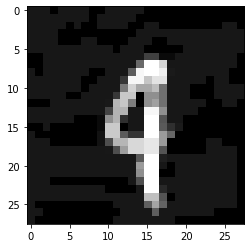

In [262]:
plt.imshow(median_smoothing(torch.clone(ad_data[0][0])).numpy(), cmap='gray', interpolation='none')

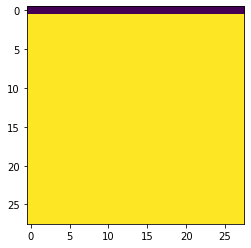

In [269]:
plt.imshow(bit_reduction(torch.clone(ad_data[0][0])))

#### TODO Generate Sample of adversials to save time. Loop Dataloader (shuffle?) until 100 examples are found. Save Image Data and corresponding label.

In [14]:
import foolbox as fb
from torch.autograd import Variable
misclassified = 0
correct=0
correct_ens = 0
jury_vote = []
ensemble_class = []
accuracies=[]
test_acc=[]
distance_l0=0
distance_l2=0
distance_linf=0
runs = 0
from foolbox.criteria import Misclassification
# test_loader
for i, data in enumerate(test_loader,0):

      input, label = data
      input, label = Variable(input.to(device)), Variable(label.to(device))

      model = network.eval()

      
      # Generate adversial dataset for attack
      fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
      #attack = fb.attacks.FGSM()
      attack = fb.attacks.L2CarliniWagnerAttack()
      epsilons = [0.1] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
      criterion = Misclassification(label)
      raw_advs, advs, is_adv = attack(fmodel, input, label, epsilons=epsilons)

      # Use ensemble to jury classify the adversial dataset
      with torch.no_grad():
            output1 = model(median_smoothing(torch.clone(raw_advs[0])))
            output2 = model(bit_reduction(torch.clone(raw_advs[0])))
            output3 = model(torch.clone(raw_advs[0]))
            output = (output1 + output2 + output3)/3# Average of three networks. Alternative is to use majority voting using output.data.max(1)[1] for each output and write it to an array to get argmax

      pred = output.data.max(1, keepdim=True)[1]
      pred_br = output2.data.max(1, keepdim=True)[1]
      pred_ms = output3.data.max(1, keepdim=True)[1]
      
      jury_data = (list(zip(pred,pred_br,pred_ms)))
      for vote in range (len(jury_data)):
            if ((np.bincount(np.array(jury_data[vote])).argmax()) == label[vote].item()):
                  correct_ens+=1

      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(label.data.view_as(pred)).sum()
      acc = 100. * pred.eq(label.data.view_as(pred)).sum() / len(input)
      test_acc.append(acc)
      #!raw_advs_ens, _,success_ens = attack(fmodel, raw_advs[0], label, epsilons=epsilons)
      #!raw_advs_ms, _,success_ms = attack(fmodel, median_smoothing(torch.clone(raw_advs[0])), label, epsilons=epsilons)
      #!raw_advs_br, _,success_br = attack(fmodel, bit_reduction(torch.clone(raw_advs[0])), label, epsilons=epsilons)
      #!for batchitem in range(0,32):
      #!      jury_vote.append([(np.array(success_ms[0][batchitem]).astype(int)),(np.array(success_br[0][batchitem]).astype(int)),(np.array(is_adv[0][batchitem]).astype(int))])
      #!      ensemble_class.append(np.bincount(jury_vote[batchitem]).argmax())
      distance_l0+=(fb.distances.l0(raw_advs[0],input)/28).mean().item()    
      distance_l2+=(fb.distances.l2(raw_advs[0],input)/28).mean().item()    
      distance_linf+=(fb.distances.linf(raw_advs[0]/28,input)).mean().item()    
      #!jury_vote+=[[success_ens,success_ms,success_br]]
      misclassified+=np.count_nonzero(is_adv.cpu().view(-1).numpy())
      #print(np.count_nonzero(is_adv.cpu().view(-1).numpy()))
      #Prüfen warum ACC in acc-Test so gut aber als ensemble bincount so schlecht
      print("Accuracy: {}".format(fb.utils.accuracy(fmodel, raw_advs[0], label)))
      print("Accuracy_Ens: {}".format(acc))
      #!print("Accuracy Median: {}".format(fb.utils.accuracy(fmodel, median_smoothing(torch.clone(raw_advs[0])), label)))
      #!print("Accuracy BitReduced: {}".format(fb.utils.accuracy(fmodel, bit_reduction(torch.clone(raw_advs[0])), label)))
      accuracies.append(fb.utils.accuracy(fmodel, raw_advs[0], label))
      runs+=1
      if runs==31:
            break 
      #!accuracies.append(fb.utils.accuracy(fmodel, median_smoothing(torch.clone(raw_advs[0])), label))
      #!accuracies.append(fb.utils.accuracy(fmodel, bit_reduction(torch.clone(raw_advs[0])), label))
#!print("Misclassified BaseNet:",misclassified)


print("Attack Success Rate: {}% with Epsylon {}".format((100/992)*misclassified,epsilons))
print("Accuracy Baseline: {}".format(np.array(accuracies).mean()))
print("Accuracy image rectificated Outputs with pooled outputs: {}".format(np.array(test_acc).mean()))
print("Accuracy image rectificated Outputs Jury: {}".format(((100/992)*correct_ens)))
#print("Attack Success Rate Ensemble: {}%".format(100/len(test_loader.dataset)*np.count_nonzero(ensemble_class)))
#print("Misclassified Image Rectification Ensemble:",np.count_nonzero(ensemble_class))
print("Distance L0: {}".format(distance_l0/runs))
print("Distance L2: {}".format(distance_l2/runs))
print("Distance Linf: {}".format(distance_linf/runs)) #Dont need to divide by runs because the distance is not averaged over the runs

Accuracy: 0.0
Accuracy_Ens: 96.875
Accuracy: 0.0
Accuracy_Ens: 100.0
Accuracy: 0.0
Accuracy_Ens: 96.875
Accuracy: 0.0
Accuracy_Ens: 100.0
Accuracy: 0.0
Accuracy_Ens: 100.0


KeyboardInterrupt: 

In [7]:
import foolbox as fb
from torch.autograd import Variable
misclassified = 0
correct=0
correct_ens = 0
jury_vote = []
ensemble_class = []
accuracies=[]
test_acc=[]
distance_l0=0
distance_l2=0
distance_linf=0
runs = 0
from foolbox.criteria import Misclassification
# test_loader
for i, data in enumerate(test_loader,0):

      input, label = data
      input, label = Variable(input.to(device)), Variable(label.to(device))

      model = network.eval()

      
      # Generate adversial dataset for attack
      fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
      #attack = fb.attacks.FGSM()
      attack = fb.attacks.L2CarliniWagnerAttack()
      epsilons = [0.5] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
      criterion = Misclassification(label)
      raw_advs, advs, is_adv = attack(fmodel, input, label, epsilons=epsilons)

      # Use ensemble to jury classify the adversial dataset
      with torch.no_grad():
            output1 = model(median_smoothing(torch.clone(raw_advs[0])))
            output2 = model(bit_reduction(torch.clone(raw_advs[0])))
            output3 = model(torch.clone(raw_advs[0]))
            output = (output1 + output2 + output3)/3# Average of three networks. Alternative is to use majority voting using output.data.max(1)[1] for each output and write it to an array to get argmax

      pred_base = output1.data.max(1, keepdim=True)[1]
      pred_br = output2.data.max(1, keepdim=True)[1]
      pred_ms = output3.data.max(1, keepdim=True)[1]
      
      jury_data = (list(zip(pred_base,pred_br,pred_ms)))
      for vote in range (len(jury_data)):
            if ((np.bincount(np.array(jury_data[vote])).argmax()) == label[vote].item()):
                  correct_ens+=1

      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(label.data.view_as(pred)).sum()
      acc = 100. * pred.eq(label.data.view_as(pred)).sum() / len(input)
      test_acc.append(acc)
      #!raw_advs_ens, _,success_ens = attack(fmodel, raw_advs[0], label, epsilons=epsilons)
      #!raw_advs_ms, _,success_ms = attack(fmodel, median_smoothing(torch.clone(raw_advs[0])), label, epsilons=epsilons)
      #!raw_advs_br, _,success_br = attack(fmodel, bit_reduction(torch.clone(raw_advs[0])), label, epsilons=epsilons)
      #!for batchitem in range(0,32):
      #!      jury_vote.append([(np.array(success_ms[0][batchitem]).astype(int)),(np.array(success_br[0][batchitem]).astype(int)),(np.array(is_adv[0][batchitem]).astype(int))])
      #!      ensemble_class.append(np.bincount(jury_vote[batchitem]).argmax())
      distance_l0+=(fb.distances.l0(raw_advs[0],input)/28).mean().item()    
      distance_l2+=(fb.distances.l2(raw_advs[0],input)/28).mean().item()    
      distance_linf+=(fb.distances.linf(raw_advs[0]/28,input)).mean().item()    
      #!jury_vote+=[[success_ens,success_ms,success_br]]
      misclassified+=np.count_nonzero(is_adv.cpu().view(-1).numpy())
      #print(np.count_nonzero(is_adv.cpu().view(-1).numpy()))
      #Prüfen warum ACC in acc-Test so gut aber als ensemble bincount so schlecht
      print("Accuracy: {}".format(fb.utils.accuracy(fmodel, raw_advs[0], label)))
      print("Accuracy_Ens: {}".format(acc))
      #!print("Accuracy Median: {}".format(fb.utils.accuracy(fmodel, median_smoothing(torch.clone(raw_advs[0])), label)))
      #!print("Accuracy BitReduced: {}".format(fb.utils.accuracy(fmodel, bit_reduction(torch.clone(raw_advs[0])), label)))
      accuracies.append(fb.utils.accuracy(fmodel, raw_advs[0], label))
      runs+=1
      if runs==7:
            break 
      #!accuracies.append(fb.utils.accuracy(fmodel, median_smoothing(torch.clone(raw_advs[0])), label))
      #!accuracies.append(fb.utils.accuracy(fmodel, bit_reduction(torch.clone(raw_advs[0])), label))
#!print("Misclassified BaseNet:",misclassified)


print("Attack Success Rate: {}% with Epsylon {}".format((100/224)*misclassified,epsilons))
print("Accuracy Baseline: {}".format(np.array(accuracies).mean()))
print("Accuracy image rectificated Outputs with pooled outputs: {}".format(np.array(test_acc).mean()))
print("Accuracy image rectificated Outputs Jury: {}".format(((100/224)*correct_ens)))
#print("Attack Success Rate Ensemble: {}%".format(100/len(test_loader.dataset)*np.count_nonzero(ensemble_class)))
#print("Misclassified Image Rectification Ensemble:",np.count_nonzero(ensemble_class))
print("Distance L0: {}".format(distance_l0/runs))
print("Distance L2: {}".format(distance_l2/runs))
print("Distance Linf: {}".format(distance_linf/runs)) #Dont need to divide by runs because the distance is not averaged over the runs

Accuracy: 0.0
Accuracy_Ens: 100.0
Accuracy: 0.0
Accuracy_Ens: 100.0
Accuracy: 0.0
Accuracy_Ens: 96.875
Accuracy: 0.0
Accuracy_Ens: 100.0
Accuracy: 0.0
Accuracy_Ens: 96.875
Accuracy: 0.0
Accuracy_Ens: 93.75
Accuracy: 0.0
Accuracy_Ens: 96.875
Attack Success Rate: 2.232142857142857% with Epsylon [0.5]
Accuracy Baseline: 0.0
Accuracy image rectificated Outputs with pooled outputs: 97.76786041259766
Accuracy image rectificated Outputs Jury: 89.28571428571429
Distance L0: 27.927296502249582
Distance L2: 0.19453600474766322
Distance Linf: 2.7458084651402066


In [8]:

print("Attack Success Rate: {}% with Epsylon {}".format((100/224)*misclassified,epsilons))
print("Accuracy Baseline: {}".format(np.array(accuracies).mean()))
print("Accuracy image rectificated Outputs with pooled outputs: {}".format(np.array(test_acc).mean()))
print("Accuracy image rectificated Outputs Jury: {}".format(((100/224)*correct_ens)))
#print("Attack Success Rate Ensemble: {}%".format(100/len(test_loader.dataset)*np.count_nonzero(ensemble_class)))
#print("Misclassified Image Rectification Ensemble:",np.count_nonzero(ensemble_class))
print("Distance L0: {}".format(distance_l0/runs))
print("Distance L2: {}".format(distance_l2/runs))
print("Distance Linf: {}".format(distance_linf/runs)) #Dont need to divide by runs because the distance is not averaged over the runs

Attack Success Rate: 2.232142857142857% with Epsylon [0.5]
Accuracy Baseline: 0.0
Accuracy image rectificated Outputs with pooled outputs: 97.76786041259766
Accuracy image rectificated Outputs Jury: 89.28571428571429
Distance L0: 27.927296502249582
Distance L2: 0.19453600474766322
Distance Linf: 2.7458084651402066


In [39]:
fb.distances.linf(raw_advs[0],input)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [33]:
(fb.distances.linf(raw_advs[0],input)).mean().item()    

0.30000007152557373

In [17]:
aa = 0
for x in range(32):
    aa+=fb.distances.l0(raw_advs[0][x][0], input[x][0]).mean()
print(aa/32)

tensor(16.2098)


In [532]:
input[1][0]

tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242

In [11]:
output.data.max(1, keepdim=True)[1]

tensor([[8],
        [3],
        [6],
        [3],
        [6],
        [5],
        [6],
        [2],
        [3],
        [1],
        [6],
        [7],
        [7],
        [9],
        [6],
        [7],
        [9],
        [5],
        [2],
        [3],
        [1],
        [3],
        [3],
        [4],
        [9],
        [1],
        [4],
        [3],
        [4],
        [0],
        [2],
        [8]])

In [145]:
label

tensor([1, 0, 9, 8, 3, 2, 1, 0, 6, 9, 2, 8, 5, 1, 6, 4, 7, 0, 9, 9, 7, 9, 0, 5,
        8, 8, 5, 0, 6, 1, 5, 7])

In [113]:
np.array(jury_data[1]).argmax()

0

8

In [125]:
label[0].item()

6

In [315]:
print(success_ens.numpy().astype(int).mean().item() * 100)
print(success_ms.numpy().astype(int).mean().item() * 100)
print(success_br.numpy().astype(int).mean().item() * 100)

96.875
96.875
90.625


tensor([484., 505., 494., 497., 487., 566., 466., 461., 503., 491., 495., 496.,
        454., 528., 472., 469., 470., 487., 538., 505., 499., 451., 486., 478.,
        505., 441., 526., 468., 522., 489., 441., 496.])

In [164]:
input[0][0][6]

tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242,  0.2249,  2.0323,  2.8088,  2.7960,  2.5542,
         2.5415,  1.7778, -0.2969, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242])

In [165]:
advs[0][0][0][6]

tensor([-0.3242, -0.3242, -0.3242, -0.4242, -0.4242, -0.4242, -0.4242,  0.9104,
         2.8215,  2.8215,  2.6960,  2.6960,  2.6960,  2.6960,  2.6960,  2.6960,
         2.7088,  2.8215,  2.7815,  0.1340, -0.3242, -0.3242, -0.3242, -0.3242,
        -0.3242, -0.3242, -0.3242, -0.4242])

In [15]:
from foolbox.models import Model
import eagerpy as ep
from typing import Any
def accuracy_median(fmodel: Model, inputs: Any, labels: Any) -> float:
    inputs_ = median_smoothing(inputs)
    inputs_, labels_ = ep.astensors(inputs_, labels)
    del inputs, labels

    predictions = fmodel(inputs_).argmax(axis=-1)
    accuracy = (predictions == labels_).float32().mean()
    return accuracy.item()

def accuracy_bit(fmodel: Model, inputs: Any, labels: Any) -> float:
    inputs_ = bit_reduction(inputs)
    inputs_, labels_ = ep.astensors(inputs_, labels)
    del inputs, labels

    predictions = fmodel(inputs_).argmax(axis=-1)
    accuracy = (predictions == labels_).float32().mean()
    return accuracy.item()

def accuracy_ens() -> float:
    return((accuracy_median(fmodel, raw_advs[0], label)+accuracy_bit(fmodel, raw_advs[0], label)+fb.utils.accuracy(fmodel, raw_advs[0], label))/3)

In [16]:
print(accuracy_median(fmodel, raw_advs[0], label))
print(accuracy_bit(fmodel, raw_advs[0], label))
print(fb.utils.accuracy(fmodel, raw_advs[0], label))
print(accuracy_ens())

0.21875
1.0
0.1875
0.46875


In [84]:
print()
print("we can also manually check this:")
print()
from foolbox import PyTorchModel, accuracy, samples
print("robust accuracy for perturbations with")
for eps, advs_ in zip(epsilons, advs):
    acc2 = accuracy(fmodel, advs_, label)
    print(f"  Linf norm ≤ {eps:<6}: {acc2 * 100:4.1f} %")
    print("    perturbation sizes:")
    perturbation_sizes = (advs_ - input).norms.linf(axis=(1, 2, 3)).numpy()
    print("    ", str(perturbation_sizes).replace("\n", "\n" + "    "))
    if acc2 == 0:
        break


we can also manually check this:

robust accuracy for perturbations with
  Linf norm ≤ 0.0   : 100.0 %
    perturbation sizes:


AttributeError: 'Tensor' object has no attribute 'norms'

### Perturabation mesasurement

In [176]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
print("Min: {}".format(min(np.ravel(x_d))))
print("Max: {}".format(max(np.ravel(x_d))))
print(abs(min(np.ravel(x_d))-max(np.ravel(x_d))))

Min: -0.4242129623889923
Max: 2.821486711502075
3.2456996


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

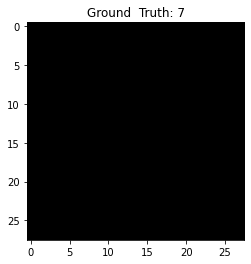

In [23]:
plt.imshow(scaled_data[0][0], cmap='gray', interpolation='none')
plt.title("Ground  Truth: {}".format(e_d[0]))
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

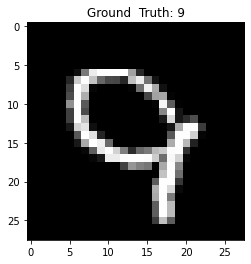

In [125]:
plt.imshow(f_d[0][0], cmap='gray', interpolation='none')
plt.title("Ground  Truth: {}".format(e_d[0]))
plt.plot


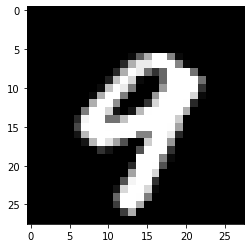

In [55]:
plt.imshow(ndimage.median_filter(f_d[0][0], size=2), cmap='gray', interpolation='none')

2


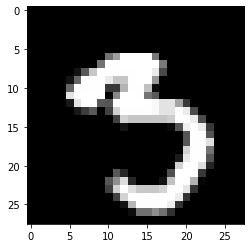

In [167]:
plt.imshow(median_smoothing(f_d[0][0]), cmap='gray', interpolation='none')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

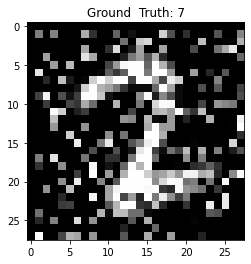

In [258]:
plt.imshow(pertubated_image[0][0], cmap='gray', interpolation='none')
plt.title("Ground  Truth: {}".format(e_d[5]))
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

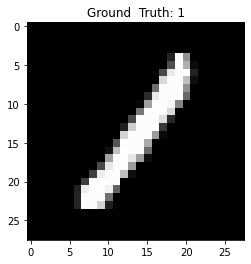

In [78]:
plt.imshow(x_d[5][0], cmap='gray', interpolation='none')
plt.title("Ground  Truth: {}".format(e_d[5]))
plt.plot

In [163]:
median_smoothed = median_smoothing(f_d)
scaled_data = bit_reduction(f_d)
pertubated_image = perturbate_image(p_d,mode='random') #Pertubations seems to make in-place operations so use different tensor

In [189]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)

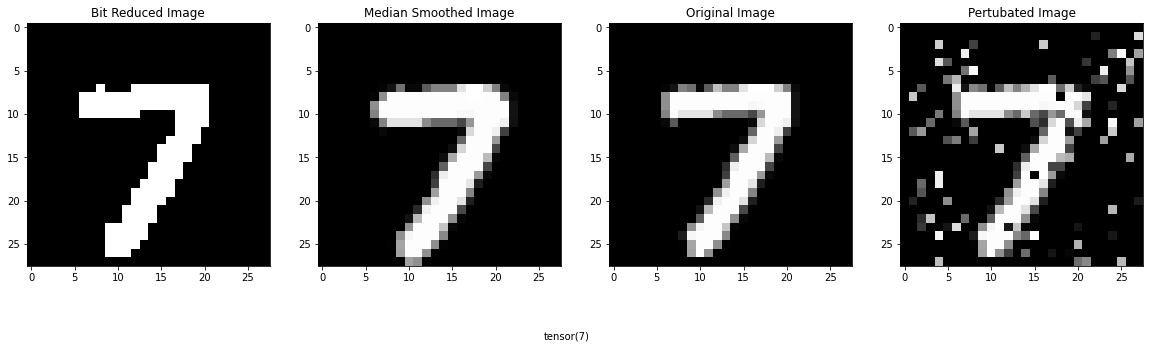

In [164]:
batch_nr = 0
fig = plt.figure()

ax1 = fig.add_subplot(141)  # left side
ax2 = fig.add_subplot(142)  # right side
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.title.set_text("Bit Reduced Image")
ax2.title.set_text("Median Smoothed Image")
ax3.title.set_text("Original Image")
ax4.title.set_text("Pertubated Image")
ax1.imshow(scaled_data[batch_nr][0], cmap='gray', interpolation='none')
ax2.imshow(median_smoothed[batch_nr][0], cmap='gray', interpolation='none')
ax3.imshow(x_d[batch_nr][0], cmap='gray', interpolation='none')
ax4.imshow(pertubated_image[batch_nr][0], cmap='gray', interpolation='none')
fig.text(.5, .05, e_d[batch_nr], ha='center')
fig.set_figheight(6)
fig.set_figwidth(20)
#plt.title("Ground  Truth: {}".format(e_d[batch_nr]))
plt.show()

### Test robustness of model

In [446]:
#networks= (network,network2,network3)
fake_tst = test_fake(f_d,network)

median_smoothed = median_smoothing(f_d)
scaled_data = bit_reduction(f_d)
pertubated_image = perturbate_image(p_d,mode='random') #Pertubations seems to make in-place operations so use different tensor

fake_tst_median = test_fake(median_smoothed,network)
fake_tst_scaled = test_fake(scaled_data,network)
fake_tst_perturbed = test_fake(pertubated_image,network)

p_percent,p_size,p_pertubated=count_perturbated_pixel(x_d[0][0],f_d[0][0])
print("Model predicted: {}".format(fake_tst.data.max(1, keepdim=True)[1][0]))
print("Model predicted median smoothed: {}".format(fake_tst_median.data.max(1, keepdim=True)[1][0]))
print("Model predicted scaled: {}".format(fake_tst_scaled.data.max(1, keepdim=True)[1][0]))
print("Model predicted perturbed: {}".format(fake_tst_perturbed.data.max(1, keepdim=True)[1][0]))
print("##################################################################")
print("Model predicted tensor value: {}".format(fake_tst.data.max(1)[0][0]))
print("Model predicted median smoothed tensor value: {}".format(fake_tst_median.data.max(1)[0][0]))
print("Model predicted scaled tensor value: {}".format(fake_tst_scaled.data.max(1)[0][0]))
print("Model predicted perturbed tensor value: {}".format(fake_tst_perturbed.data.max(1)[0][0]))
print("##################################################################")
print("Model real: {}".format(e_d[0]))
print("Sum pixel: {}".format(p_size))
print("Pertubated pixel: {}".format(p_pertubated))
print("Percent preturbated: {}".format(p_percent))

# Get prdicted tensor for normal model and squeezec models and calcluate the difference
# If difference is small, the image is not pertubated

TypeError: iteration over a 0-d tensor

In [167]:
tst= F.softmax(fake_tst, dim=1)
tst_med = F.softmax(fake_tst_median, dim=1)
tst_scaled = F.softmax(fake_tst_scaled, dim=1)
tst_perturbed = F.softmax(fake_tst_perturbed, dim=1)

In [86]:
tst[0]
tst_med[0]
tst_scaled[0]
tst_perturbed[0]

tensor([3.3206e-06, 1.1545e-06, 1.5094e-07, 3.8977e-03, 3.1818e-05, 9.0611e-01,
        9.5761e-06, 3.4804e-06, 4.9355e-02, 4.0588e-02])

In [168]:
difference=max(tst[0])-max(tst_perturbed[0])

In [169]:
print(format(difference, 'f'))

0.048123


# Tst perturbated example

Model predicted: tensor([2])
Model predicted median smoothed: tensor([2])
Model predicted scaled: tensor([2])
##################################################################
Model predicted tensor value: 19.3311767578125
Model predicted median smoothed tensor value: 19.64731216430664
Model predicted scaled tensor value: 19.95734405517578
##################################################################
Model real: 2
Sum pixel: 784
Pertubated pixel: 95
Percent preturbated: 0.1211734693877551


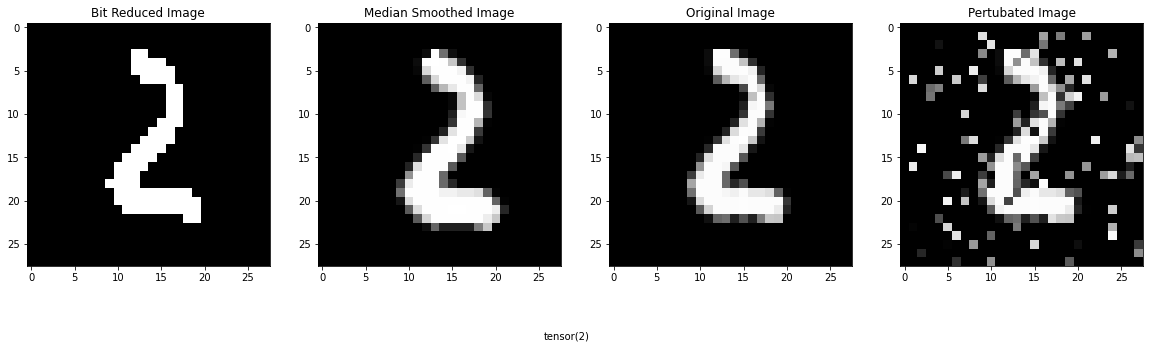

In [462]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
#networks= (network,network2,network3)

pertubated_image = perturbate_image(p_d,mode='random') #Pertubations seems to make in-place operations so use different tensor
image = f_d
fake_tst = test_fake(image,network)

median_smoothed = median_smoothing(image)
scaled_data = bit_reduction(image)


fake_tst_median = test_fake(median_smoothed,network)
fake_tst_scaled = test_fake(scaled_data,network)


p_percent,p_size,p_pertubated=count_perturbated_pixel(x_d,pertubated_image)
print("Model predicted: {}".format(fake_tst.data.max(1, keepdim=True)[1][0]))
print("Model predicted median smoothed: {}".format(fake_tst_median.data.max(1, keepdim=True)[1][0]))
print("Model predicted scaled: {}".format(fake_tst_scaled.data.max(1, keepdim=True)[1][0]))

print("##################################################################")
print("Model predicted tensor value: {}".format(fake_tst.data.max(1)[0][0]))
print("Model predicted median smoothed tensor value: {}".format(fake_tst_median.data.max(1)[0][0]))
print("Model predicted scaled tensor value: {}".format(fake_tst_scaled.data.max(1)[0][0]))

print("##################################################################")
print("Model real: {}".format(e_d[0]))
print("Sum pixel: {}".format(p_size))
print("Pertubated pixel: {}".format(p_pertubated))
print("Percent preturbated: {}".format(p_percent))

####

batch_nr = 0
fig = plt.figure()

ax1 = fig.add_subplot(141)  # left side
ax2 = fig.add_subplot(142)  # right side
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.title.set_text("Bit Reduced Image")
ax2.title.set_text("Median Smoothed Image")
ax3.title.set_text("Original Image")
ax4.title.set_text("Pertubated Image")
ax1.imshow(scaled_data[batch_nr][0], cmap='gray', interpolation='none')
ax2.imshow(median_smoothed[batch_nr][0], cmap='gray', interpolation='none')
ax3.imshow(x_d[batch_nr][0], cmap='gray', interpolation='none')
ax4.imshow(pertubated_image[batch_nr][0], cmap='gray', interpolation='none')
fig.text(.5, .05, e_d[batch_nr], ha='center')
fig.set_figheight(6)
fig.set_figwidth(20)
#plt.title("Ground  Truth: {}".format(e_d[batch_nr]))
plt.show()


In [463]:
tst= F.softmax(fake_tst, dim=1)
tst_med = F.softmax(fake_tst_median, dim=1)
tst_scaled = F.softmax(fake_tst_scaled, dim=1)
difference_ms=(tst[0])-(tst_med[0])
difference_br=(tst[0])-(tst_scaled[0])


In [464]:

print(max(difference_ms))
print(max(difference_br))
distance_list=[max(difference_br).item(),max(difference_ms).item()]
#difference_total = statistics.fmean(distance_list)
difference_total = max(distance_list)
print("Max Tensor Distance:", difference_total)

if (difference_total > 0.00005):
    print("Image is pertubated")
else:
    print("Image is not pertubated")

tensor(2.3842e-07)
tensor(1.5251e-07)
Max Tensor Distance: 2.384185791015625e-07
Image is not pertubated


In [32]:
%run "c:\GIT\Programme\code\Master\Koch\Robustness of Generative Adversial Networks\src\Models\upgraded_net_hook.py"

In [31]:
%run "c:\GIT\Programme\code\Master\Koch\Robustness of Generative Adversial Networks\src\functions\f2d.py"

upgraded_net_hook.nn

Train:


AttributeError: module 'upgraded_net_hook' has no attribute 'ResNet20'